In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging
import geopandas as gpd

In [2]:
point_file = gpd.read_file("radiasi_point_.shp")
point_file

,MEAN_X,MEAN_Y,spt,Radiasi,Bulan,geometry
0,110.151778,-7.598635,3,118.5,Agustus,POINT (406434.129 9159981.684)
1,110.181452,-7.600729,2,118.5,Agustus,POINT (409708.125 9159756.404)
2,110.228624,-7.575690,1,118.5,Agustus,POINT (414906.873 9162534.238)
3,110.235231,-7.408514,7,124.8,Agustus,POINT (415603.685 9181018.330)
4,110.180655,-7.643306,6,118.5,Agustus,POINT (409629.163 9155048.964)
5,110.080740,-7.568017,5,118.5,Agustus,POINT (398590.270 9163350.854)
6,110.161540,-7.597674,4,124.8,Agustus,POINT (407510.906 9160089.965)
7,110.174696,-7.495147,11,118.5,Agustus,POINT (408940.739 9171428.237)
8,110.261501,-7.565325,10,124.8,Agustus,POINT (418531.898 9163686.500)
9,110.290914,-7.365595,9,208.9,Agustus,POINT (421741.340 9185773.475)


In [40]:
data = np.array(point_file['Radiasi'])
data

array([118.5, 118.5, 118.5, 124.8, 118.5, 118.5, 124.8, 118.5, 124.8,
       208.9, 208.9, 208.9, 118.5, 208.9, 124.8, 160.9, 208.9, 160.9,
       160.9, 208.9, 208.9, 124.8, 208.9, 208.9, 208.9, 208.9, 160.9])

In [41]:
x = np.array(point_file['MEAN_X'])
x

array([110.15177769, 110.18145217, 110.22862357, 110.23523148,
       110.18065544, 110.08073979, 110.16154041, 110.17469606,
       110.26150057, 110.29091421, 110.27904808, 110.20728818,
       110.16102355, 110.2357271 , 110.13684166, 110.3288152 ,
       110.18884368, 110.29971389, 110.26772942, 110.4070354 ,
       110.32737391, 110.24704837, 110.27970352, 110.37097851,
       110.34247303, 110.33178614, 110.25802216])

In [42]:
y = np.array(point_file['MEAN_Y'])
y

array([-7.59863478, -7.60072935, -7.57569041, -7.40851372, -7.64330578,
       -7.5680174 , -7.59767436, -7.49514677, -7.56532518, -7.36559497,
       -7.38400067, -7.43623695, -7.61370466, -7.4423915 , -7.48364612,
       -7.51076098, -7.51118413, -7.61858069, -7.60566103, -7.45754627,
       -7.48854311, -7.41140787, -7.50742145, -7.53905278, -7.43739091,
       -7.33238945, -7.48268686])

Text(0.5, 1.0, 'Measured Porosity')

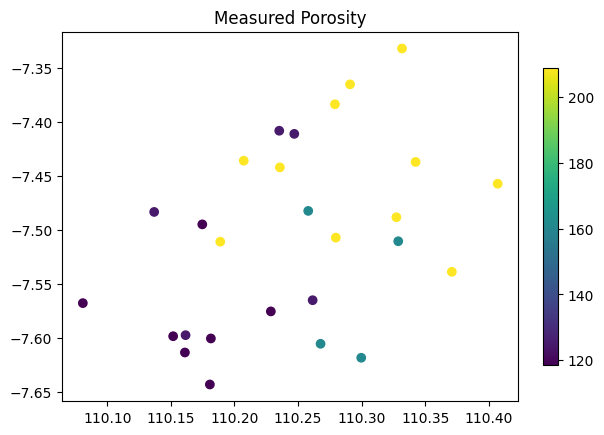

In [43]:
cax = plt.scatter(x, y, c=data)
cbar = plt.colorbar(cax, fraction=0.03)
plt.title('Measured Porosity')

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'gaussian' Variogram Model
Partial Sill: 3610.2493431395123
Full Sill: 3901.7989813641498
Range: 0.3333635553544249
Nugget: 291.54963822463765 



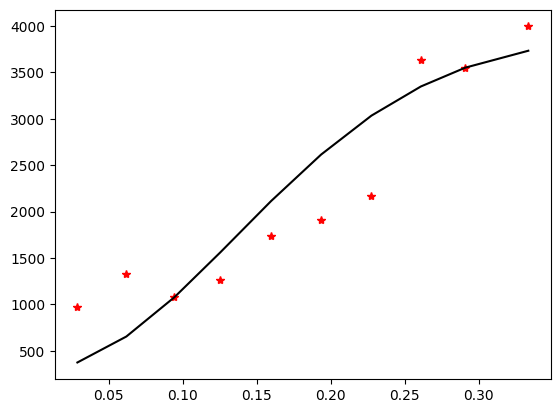

Calculating statistics on variogram model fit...


In [44]:
OK = OrdinaryKriging(
    x, 
    y, 
    data, 
    variogram_model='gaussian',
    verbose=True,
    enable_plotting=True,
    nlags=10,
)

In [45]:
OK.variogram_model_parameters

array([3.61024934e+03, 3.33363555e-01, 2.91549638e+02])

In [110]:
gridx = np.arange(110.0, 110.5, 0.001, dtype='float64')
gridy = np.arange(-7.7, -7.0, 0.001, dtype='float64')
zstar, ss = OK.execute("grid", gridx, gridy)

Executing Ordinary Kriging...



In [97]:
zstar[0].data

array([138.88668053, 137.14001293, 135.39492525, 133.66628383,
       131.9700731 , 130.32336744, 128.74429102, 127.25195812,
       125.86638484, 124.6083625 , 123.49928262, 122.56090466,
       121.81505906, 121.2832813 , 120.98637627, 120.94391677,
       121.17368509, 121.69107178, 122.50845084, 123.63455518,
       125.07387973, 126.82614203, 128.8858308 , 131.24187192,
       133.87743872, 136.76992822, 139.89111932, 143.20752073,
       146.68090814, 150.26904103, 153.92654059, 157.60590179,
       161.25860558, 164.83629164, 168.29194823, 171.5810746 ,
       174.66277185, 177.50072143, 180.06401547, 182.32780977,
       184.27377873, 185.89036002, 187.17278642, 188.12291113,
       188.74884134, 189.06440221, 189.08845917, 188.84413092,
       188.35792786, 187.65885126])

In [98]:
len(zstar[0].data)

50

In [104]:
print(zstar.shape)
print(ss.shape)

(1, 1)
(1, 1)


Text(0.5, 1.0, 'Porosity estimate')

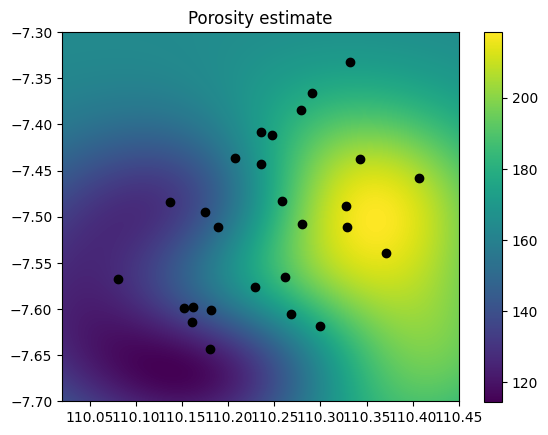

In [111]:
cax = plt.imshow(zstar, extent=(110.02, 110.45, -7.7, -7.3), origin='lower')
plt.scatter(x, y, c='k', marker='o')
cbar=plt.colorbar(cax)
plt.title('Porosity estimate')

Text(0.5, 1.0, 'Porosity standard devation')

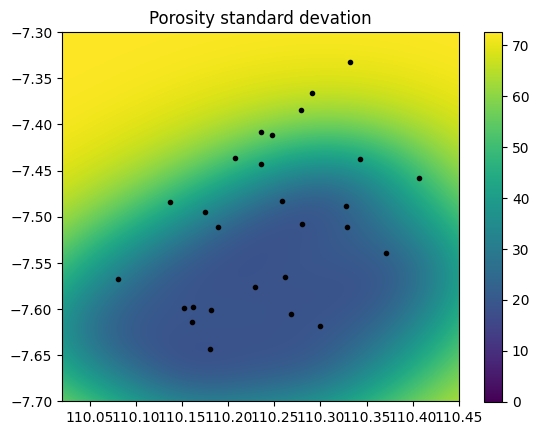

In [112]:
cax = plt.imshow(np.sqrt(ss), extent=(110.02, 110.45, -7.7, -7.3), origin='lower', vmin = 0)
plt.scatter(x, y, c='k', marker='.')
cbar=plt.colorbar(cax)
plt.title('Porosity standard devation')

In [113]:
OK.variogram_model_parameters

array([3.61024934e+03, 3.33363555e-01, 2.91549638e+02])